# Let's visualize certain toy dataset

Let's retrieve dataset without even leaving jupyter notebook:

In [1]:
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2020-02-26 14:16:10--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.240.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.240.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3,9K) [text/plain]
Saving to: ‘iris.csv.1’

iris.csv.1          100%[===================>]   3,88K  --.-KB/s    in 0s      

2020-02-26 14:16:10 (86,0 MB/s) - ‘iris.csv.1’ saved [3975/3975]



Now, import some tools that we are going to use.

In [2]:
import numpy as np # numerical library (binds Fortran functions)
import scipy as sp # scientific library (statistics, least-square solver, etc)
import pandas as pd # simplifies handling with datasets, handling is similar to matlab or R
import matplotlib as mpl # Matplotlib is plotting library
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Use Panda's parser for CSV files. Jupyter has AUTOCOMPLETE. Use it with <TAB>, like pd.<TAB>
df = pd.read_csv('./iris.csv') # Jupyter also autocompletes path

In [4]:
df # Show what we are dealing with

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
df.info() # CS oriented summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe() # Mathematical / Statistical summary

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.sample(n=10) # Show us 10 random samples (defult n=1)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
88,5.6,3.0,4.1,1.3,Versicolor
61,5.9,3.0,4.2,1.5,Versicolor
141,6.9,3.1,5.1,2.3,Virginica
12,4.8,3.0,1.4,0.1,Setosa
32,5.2,4.1,1.5,0.1,Setosa
145,6.7,3.0,5.2,2.3,Virginica
38,4.4,3.0,1.3,0.2,Setosa
149,5.9,3.0,5.1,1.8,Virginica
30,4.8,3.1,1.6,0.2,Setosa


In [8]:
df.T # Rotate table, which is useful, if you have large number for features

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal.length,5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal.width,3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal.length,1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal.width,0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
variety,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,Setosa,...,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica,Virginica


# Visualization basics 

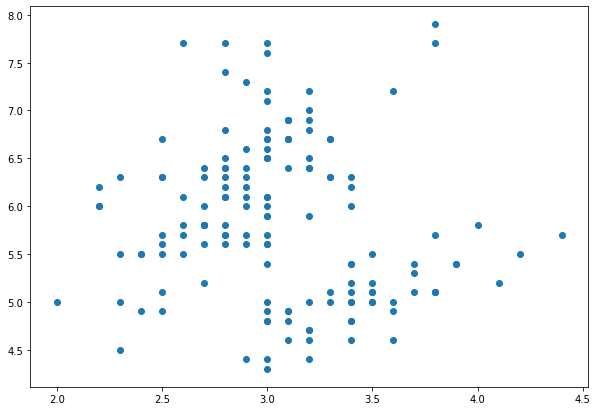

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(df['sepal.width'], df['sepal.length'])

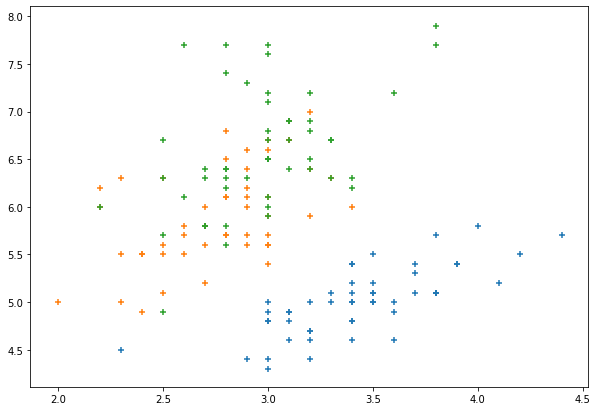

In [10]:
plt.figure(figsize=(10,7))

for label in df.variety.unique():
    plt.scatter(data=df[df.variety==label], x='sepal.width', y='sepal.length', marker='+')

In these two example we use global figure and axis objects. It is nice for quick plots. What about multiple figures?

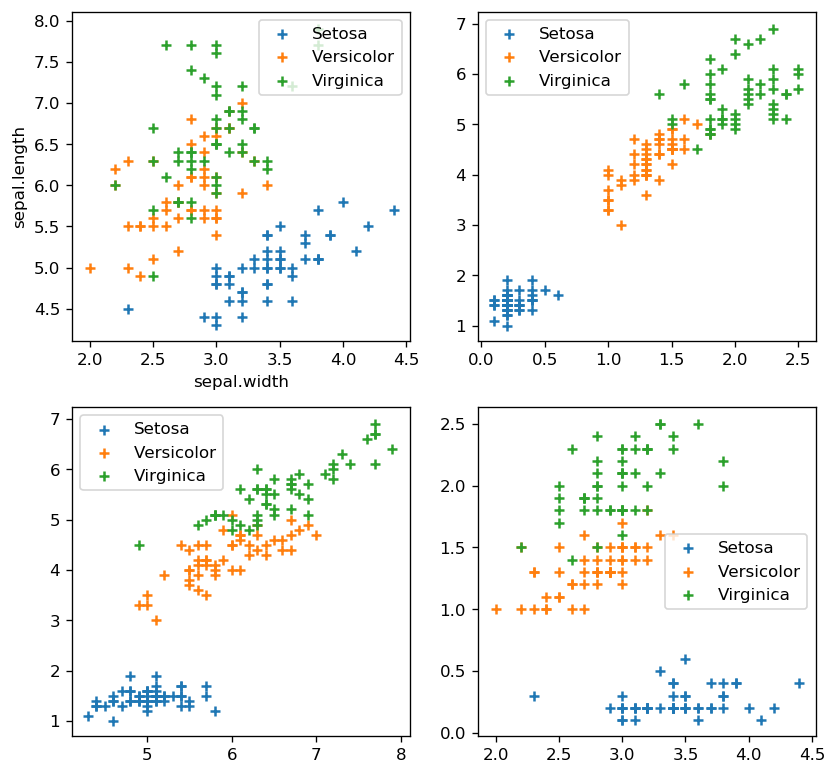

In [11]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,8), dpi=120)
ax = axes.flatten() # In this case axes is 2x2 array, flatten will convert it a list

# Let's say that we wish to visually inspect multi-dimensional data
for label in df.variety.unique():
    ax[0].scatter(data=df[df.variety==label], x='sepal.width', y='sepal.length', marker='+', label=label)
    ax[0].set_xlabel('sepal.width')
    ax[0].set_ylabel('sepal.length')
    
    ax[1].scatter(data=df[df.variety==label], x='petal.width', y='petal.length', marker='+', label=label)
    ax[2].scatter(data=df[df.variety==label], x='sepal.length', y='petal.length', marker='+', label=label)
    ax[3].scatter(data=df[df.variety==label], x='sepal.width', y='petal.width', marker='+', label=label)
    
for axis in ax:
    axis.legend()
    

It takes some time to construct code for this figures. Can we simplify it? [Seaborn](https://seaborn.pydata.org/) to the help! Seaborn offers 20+ predefined plots, with some degree of customization.

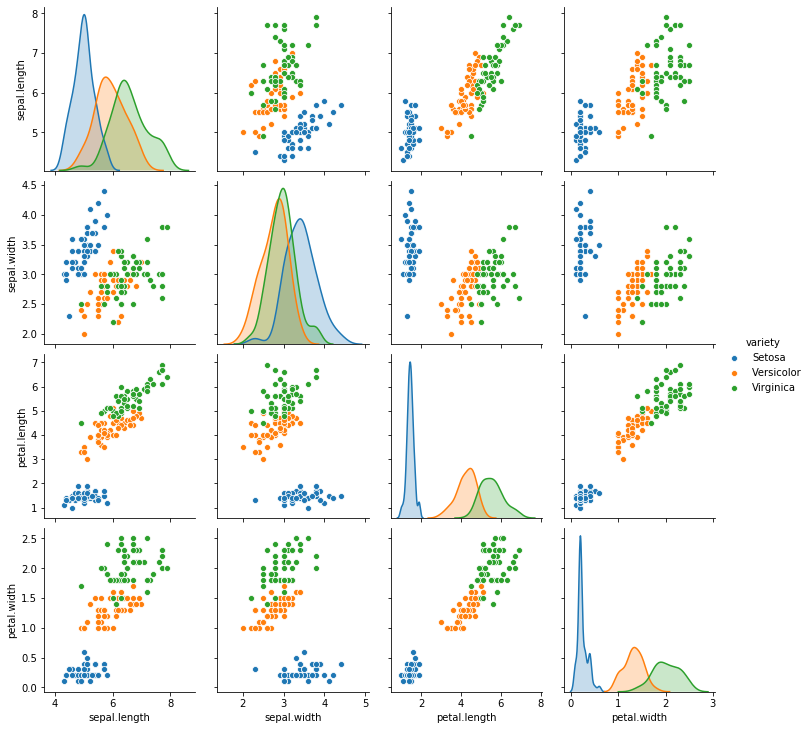

In [12]:
import seaborn as sns
#plt.figure(figsize=(8,8))
sns.pairplot(df, hue="variety")

# "Tips" dataset

The "tips" dataset is a toy dataset about money tips. It is interesting to see how day of the week, gender, total bill, time, and number of attenders affects the amount of money tip.

In [13]:
!wget https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv

--2020-02-26 14:16:17--  https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.240.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.240.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9729 (9,5K) [text/plain]
Saving to: ‘tips.csv’

tips.csv            100%[===================>]   9,50K  --.-KB/s    in 0s      

2020-02-26 14:16:17 (116 MB/s) - ‘tips.csv’ saved [9729/9729]



In [14]:
tips = pd.read_csv('tips.csv')
tips.sample(n=10)

,total_bill,tip,sex,smoker,day,time,size
37,16.93,3.07,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
0,16.99,1.01,Female,No,Sun,Dinner,2
219,30.14,3.09,Female,Yes,Sat,Dinner,4
92,5.75,1.00,Female,Yes,Fri,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3
131,20.27,2.83,Female,No,Thur,Lunch,2
233,10.77,1.47,Male,No,Sat,Dinner,2
201,12.74,2.01,Female,Yes,Thur,Lunch,2
14,14.83,3.02,Female,No,Sun,Dinner,2


One way to present multi-dimensional data is violin plot.

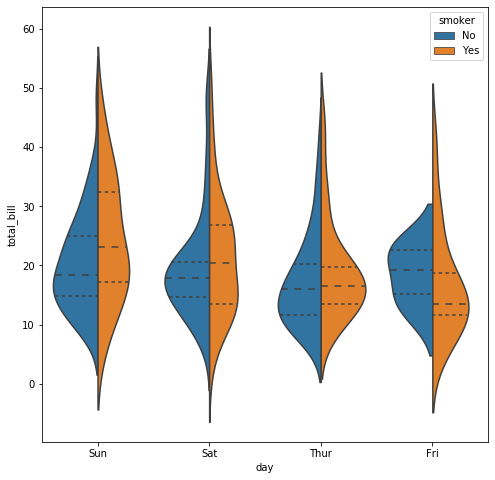

In [15]:
mpl.rc("text", usetex=False) # workaround for latex in names
plt.figure(figsize=(8,8))
sns.violinplot(x="day", y="total_bill", hue="smoker", split=True, inner="quart", data=tips)

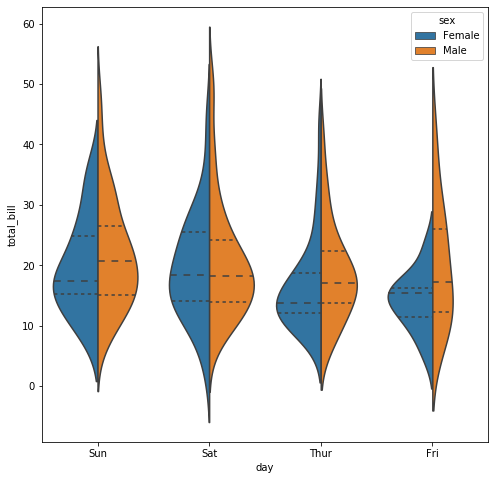

In [16]:
# Compare by gender
mpl.rc("text", usetex=False) # workaround for latex in names
plt.figure(figsize=(8,8))
sns.violinplot(x="day", y="total_bill", hue="sex", split=True, inner="quart", data=tips)